In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
files = glob.glob("./data/scan/221201-3/*.csv")
print(files)

# file
dfs =[]
sample_names =[]
for file in files[:]:
    dfs.append(pd.read_csv(file, index_col=0))
    sample_names.append(file[-33:-4])

print(sample_names)
dfs[0].head()

['./data/scan/221201-3\\2022-12-01-14-44-21_scan_VT2030410.csv', './data/scan/221201-3\\2022-12-01-15-49-10_scan_V12030410.csv', './data/scan/221201-3\\2022-12-01-16-51-05_scan_V22030410.csv', './data/scan/221201-3\\2022-12-01-17-45-53_scan_V32030410.csv']
['12-01-14-44-21_scan_VT2030410', '12-01-15-49-10_scan_V12030410', '12-01-16-51-05_scan_V22030410', '12-01-17-45-53_scan_V32030410']


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/12/01 14:42:55,34.992981,24.715881,422555.0,765772.0,3902.657727,1218.359960,82.275053,6.554503,1.617056e+15,3.243460e+15,14.9,15.0
1,2022/12/01 14:42:57,34.957886,24.715881,419096.0,762793.0,4030.693244,1221.589105,34.948544,2.514058,1.617079e+15,3.243506e+15,14.9,15.0
2,2022/12/01 14:42:59,34.974670,24.742584,413762.0,764997.0,4120.015571,1218.386637,39.062885,0.793959,1.617102e+15,3.243552e+15,14.9,15.0
3,2022/12/01 14:43:02,34.973145,24.734573,407691.0,760574.0,4202.946909,1216.020222,36.020844,7.086217,1.617126e+15,3.243599e+15,14.9,15.0
4,2022/12/01 14:43:04,34.928894,24.734573,403710.0,765593.0,4278.772394,1210.029129,39.709766,10.032442,1.617149e+15,3.243645e+15,14.9,15.0


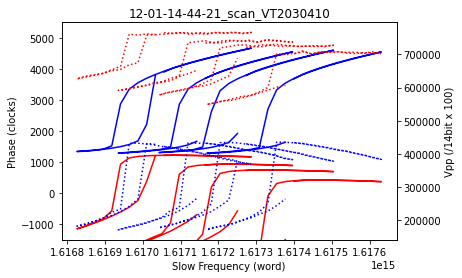

In [3]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

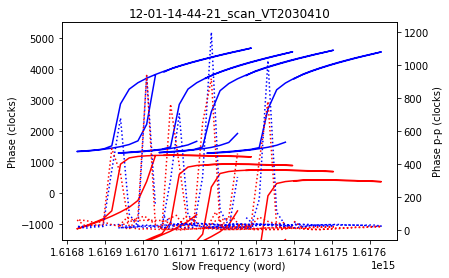

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

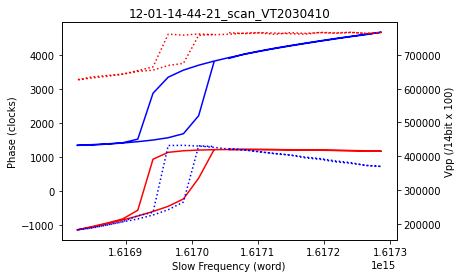

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

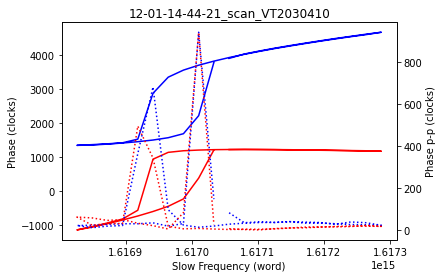

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

In [7]:
labels =["25deg", "15deg", "15deg", "35deg", "35deg", "25deg"]

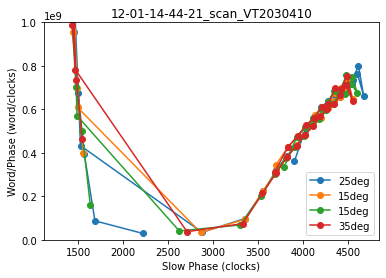

In [8]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Slow Phase (clocks)")
ax1.set_ylabel("Word/Phase (word/clocks)")
plt.title(sample_names[0])

ax1.set_ylim(0,1e9)

for i, df in enumerate(dfs):
    delta_slow = np.array([df["delay_slow"][i+1]-  df["delay_slow"][i] for i in range(len(df)-1)])
    delta_Ch2_word = np.array([df["Ch2_word"][i+1]-  df["Ch2_word"][i] for i in range(len(df)-1)])
    ax1.plot(df["delay_slow"][:-1], delta_Ch2_word/delta_slow, "-o", label=labels[i])
    
ax1.legend()


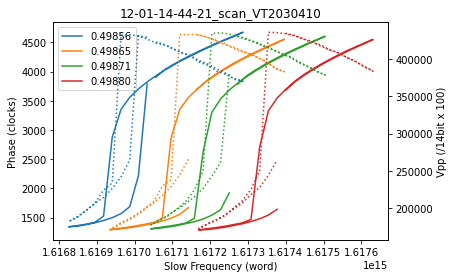

In [9]:
labels =["0.49856", "0.49865", "0.49871", "0.49880"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs[:]):
    ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    #ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

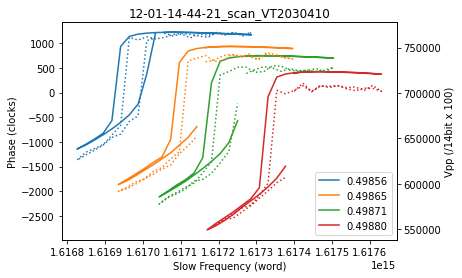

In [10]:
labels =["0.49856", "0.49865", "0.49871", "0.49880"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs[:]):
    #ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

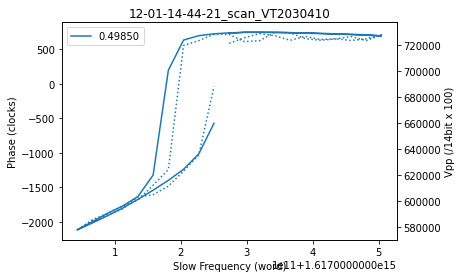

In [11]:
labels =["0.49850"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate([dfs[2]]):
    #ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

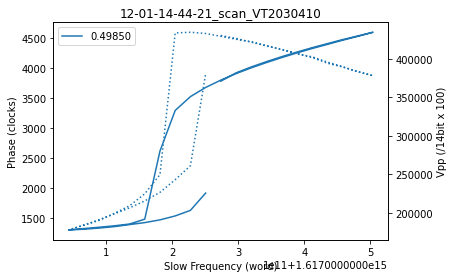

In [12]:
labels =["0.49850"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate([dfs[2]]):
    ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    #ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()